# MI2 - ES03: Batch preprocessing and Online PCA
## The chantastic 4: Elisabeth Kress, Paola Suárez, Jianmeng Wu and Esra Zihni

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
%matplotlib inline

## 1. Preprocessing

### 1. a) Load data and compute PCA

In [3]:
# 2d data
filename = "pca2.csv"
data = np.loadtxt(filename, delimiter=',', skiprows=1)

# Zero-mean
data -= data.mean(axis=0)

In [4]:
# PCA
cov = np.cov(data.T)
l, w = LA.eig(cov)

# Projection into PCs
PCs = np.dot(w.T, data.T)

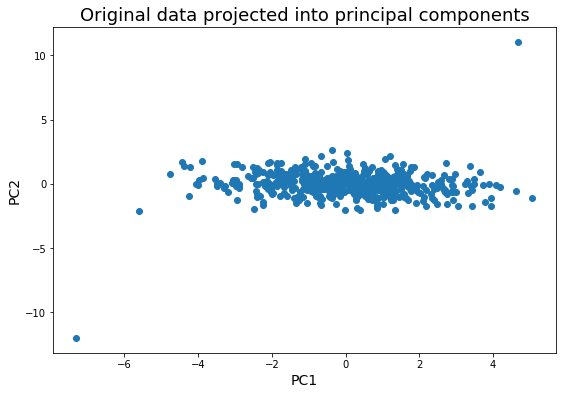

In [5]:
# Plot
plt.figure(figsize=(9,6))
plt.scatter(PCs[0,:], PCs[1,:])
plt.title("Original data projected into principal components", size=18)
plt.xlabel("PC1", size=14)
plt.ylabel("PC2", size=14)
plt.show()

The reconstruction unveils two outliers, which are far-away from the main subgroup and diminish the variance within the main subgroup.

### 1. b) Remove outliers

In [6]:
# Remove 17 and 157, i.e. 16 and 156 in python indexing.
data_wo = np.delete(data, [16, 156], axis=0)

In [7]:
# PCA
cov_wo = np.cov(data_wo.T)
l_wo, w_wo = LA.eig(cov_wo)

# Projection onto PCs
PCs_wo = np.dot(w_wo.T, data_wo.T)

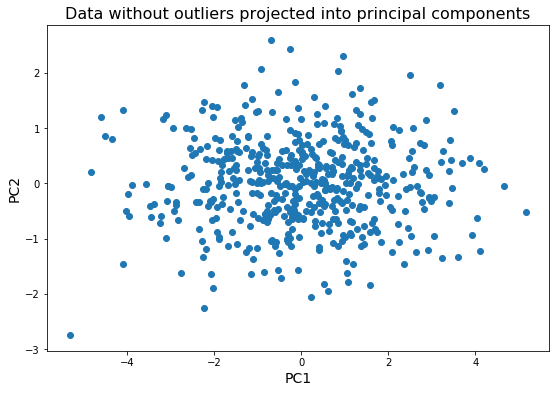

In [8]:
# Plot
plt.figure(figsize=(9,6))
plt.scatter(PCs_wo[0], PCs_wo[1])
plt.title("Data without outliers projected into principal components", size=16)
plt.xlabel("PC1", size=14)
plt.ylabel("PC2", size=14)
plt.show()

Now, the dataset is spanned homogeniously through the principal components.

## 2. Whitening

### 2. a) Load data set and check for outliers

In [37]:
# 4d data
filename = "pca4.csv"
data4 = np.loadtxt(filename, delimiter=',', skiprows=1)

# Zero mean
data4 -= np.mean(data4, axis=0)

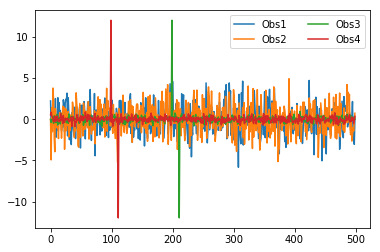

In [59]:
# Plot to check for outliers
plt.figure()
for c in range(data4.shape[-1]):
    plt.plot(data4[:,c], label="Obs%i" %(c+1))
plt.legend(ncol=2)
plt.show()

We have four outliers; to have reasonable data for PCA we will remove them.

In [50]:
# Finda max and min
data4_wo = data4.copy()
max_idx = np.unravel_index(np.argmax(data4_wo), data4_wo.shape)
min_idx = np.unravel_index(np.argmin(data4_wo), data4_wo.shape)

In [52]:
# Mask the outliers with zero (np.nan doesn't work and we can't remove because the dimensions of the array will change)
# Further suggestions?
while data4_wo[min_idx] < -10 or data4_wo[max_idx] > 10:
    data4_wo[max_idx] = 0
    data4_wo[min_idx] = 0
    max_idx = np.unravel_index(np.argmax(data4_wo), data4_wo.shape)
    min_idx = np.unravel_index(np.argmin(data4_wo), data4_wo.shape)

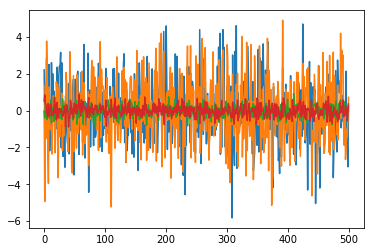

In [61]:
# Plot again to see the result
plt.figure()
plt.plot(data4_wo)
plt.show()

### 2. b) PCA algorithm

In [65]:
# PCA
cov_wo = np.cov(data4_wo.T)
l_wo, w_wo = LA.eig(cov_wo)

# Projection onto PCs
PCs_wo = np.dot(w_wo.T, data4_wo.T)

# Normalize eigenvalues
l_wo = np.real(l_wo)/LA.norm(l_wo)

In [90]:
np.linspace(1,4,4)

array([ 1.,  2.,  3.,  4.])

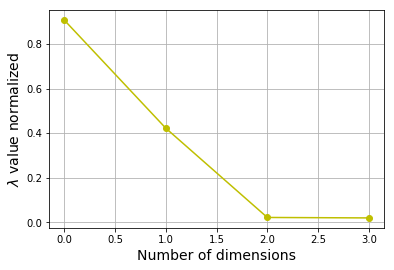

In [97]:
# Scree plot
plt.figure()
plt.plot(l_wo, 'yo-')
plt.xlabel("Number of dimensions", size=14)
plt.ylabel(r"$\lambda$ value normalized", size=14)
plt.grid()
plt.show()

Three PCs are necessary to represent the data well.

### 2. c) Whiten the data

### 2. d) Heat plots